<a href="https://colab.research.google.com/github/taarusshwd/IPL-First-Innings-Score-Predictor/blob/main/IPL_Innings_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'taarusshwadhwa'
os.environ['KAGGLE_KEY'] = 'f2ef5c63de2d4d9d7d2f5b93735d0395'

In [3]:
! kaggle datasets download -d yuvrajdagur/ipl-dataset-season-2008-to-2017

  0% 0.00/738k [00:00<?, ?B/s]
100% 738k/738k [00:00<00:00, 49.5MB/s]


In [4]:
! unzip ipl-dataset-season-2008-to-2017.zip

Archive:  ipl-dataset-season-2008-to-2017.zip
  inflating: data.csv                


In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
data.shape

(76014, 15)

In [8]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [10]:
data.nunique()

mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [11]:
data.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [12]:
data.isnull().sum()

mid               0
date              0
venue             0
batting_team      0
bowling_team      0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [13]:
data.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [14]:
unnecessary_cols = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
print("Before removing the columns: {}".format(data.shape))
data = data.drop(unnecessary_cols, axis=1)
print("After removing the columns: {}".format(data.shape))
data.head()

Before removing the columns: (76014, 15)
After removing the columns: (76014, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad',
       ]

data = data[(data['batting_team'].isin(consistent_teams)) & (data['bowling_team'].isin(consistent_teams))]
print("The consistent teams throughout IPL have been: {}".format(consistent_teams))
print("After removing temporary teams: {}".format(data.shape))

The consistent teams throughout IPL have been: ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']
After removing temporary teams: (53811, 8)


In [17]:
data = data[data['overs'] >= 5]
print("After removing first 5 over from every match: {}".format(data.shape))

After removing first 5 over from every match: (40108, 8)


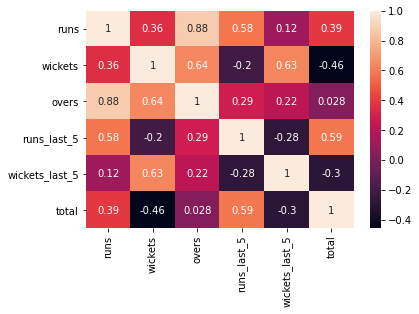

In [18]:
from seaborn import heatmap
heatmap(data=data.corr(), annot=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  data[col] = label_encoder.fit_transform(data[col])
data.head() 

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')


In [21]:
data = np.array(col_transformer.fit_transform(data))

In [22]:
cols =  ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns = cols)

In [23]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


In [24]:
from sklearn.model_selection import train_test_split
features = df.drop('total', axis=1)
labels = df['total']

In [25]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, shuffle=True)

In [26]:
print("Training Set size: {}".format(train_features.shape))
print("Testing Set size: {}".format(test_features.shape))

Training Set size: (32086, 21)
Testing Set size: (8022, 21)


In [27]:
models = dict()

In [28]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(train_features, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
train_score_tree = str(dec_tree.score(train_features, train_labels) * 100)
test_score_tree = str(dec_tree.score(test_features, test_labels) * 100)
print("Training Score = {}% \n Testing Score = {}%".format(train_score_tree[:5], test_score_tree[:5]))
models["tree"] = test_score_tree

Training Score = 99.98% 
 Testing Score = 85.56%


In [30]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, dec_tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, dec_tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, dec_tree.predict(test_features))))) 

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.9039516330092248
Mean Squared Error (MSE): 129.18695462478186
Root Mean Squared Error (RMSE): 11.366043930267992


In [31]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
train_score_linear = str(linreg.score(train_features, train_labels) * 100)
test_score_linear = str(linreg.score(test_features, test_labels) * 100)
print("Training Score = {}% \n Testing Score = {}%".format(train_score_linear[:5], test_score_linear[:5]))
models["linear regression"] = test_score_linear

Training Score = 65.88% 
 Testing Score = 66.04%


In [33]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.04847669822525
Mean Squared Error (MSE): 303.8490948407204
Root Mean Squared Error (RMSE): 17.431267734755277


In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
train_score_forest = str(forest.score(train_features, train_labels) * 100)
test_score_forest = str(forest.score(test_features, test_labels) * 100)
print("Training Score = {}% \n Testing Score = {}%".format(train_score_forest[:5], test_score_forest[:5]))
models["random forest regressor"] = test_score_forest

Training Score = 99.04% 
 Testing Score = 93.57%


In [36]:
print("---- Random Forest Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 4.415289053317662
Mean Squared Error (MSE): 57.47047566692552
Root Mean Squared Error (RMSE): 7.580928417214182


In [37]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(train_features, train_labels)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [38]:
train_score_lasso = str(lasso.score(train_features, train_labels) * 100)
test_score_lasso = str(lasso.score(test_features, test_labels) * 100)
print("Training Score = {}% \n Testing Score = {}%".format(train_score_lasso[:5], test_score_lasso[:5]))
models["Lasso Regression"] = test_score_lasso

Training Score = 64.91% 
 Testing Score = 64.91%


In [39]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, lasso.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, lasso.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, lasso.predict(test_features)))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.124098127771576
Mean Squared Error (MSE): 314.0114885425273
Root Mean Squared Error (RMSE): 17.72036931168556


In [40]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(train_features, train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
train_score_svm = str(svm.score(train_features, train_labels) * 100)
test_score_svm = str(svm.score(test_features, test_labels) * 100)
print("Training Score = {}% \n Testing Score = {}%".format(train_score_svm[:5], test_score_svm[:5]))
models["Support Vector Machines"] = test_score_svm

Training Score = 57.48% 
 Testing Score = 57.12%


In [42]:
print("---- Support Vector Machine - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Machine - Model Evaluation ----
Mean Absolute Error (MAE): 14.792648247829014
Mean Squared Error (MSE): 383.73307634644533
Root Mean Squared Error (RMSE): 19.589106062974015


In [43]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)
neural_net.fit(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [44]:
train_score_neural_net = str(neural_net.score(train_features, train_labels) * 100)
test_score_neural_net = str(neural_net.score(test_features, test_labels) * 100)
print("Training Score = {}% \n Testing Score = {}%".format(train_score_neural_net[:5], test_score_neural_net[:5]))
models["Neural Networks"] = test_score_neural_net

Training Score = 85.94% 
 Testing Score = 85.15%


In [45]:
print("---- Support Vector Machine - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, neural_net.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, neural_net.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, neural_net.predict(test_features)))))

---- Support Vector Machine - Model Evaluation ----
Mean Absolute Error (MAE): 8.216718303131085
Mean Squared Error (MSE): 132.84314496332019
Root Mean Squared Error (RMSE): 11.525760060114049


In [46]:
print(models)

{'tree': '85.565174629981', 'linear regression': '66.0491368063972', 'random forest regressor': '93.57848257516817', 'Lasso Regression': '64.9136322281445', 'Support Vector Machines': '57.12322531443479', 'Neural Networks': '85.1566467781585'}


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


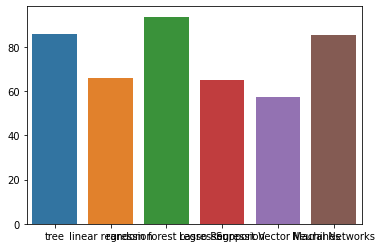

In [47]:
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

In [48]:
def predict_final_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array=[]

  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  

  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  prediction = model.predict(prediction_array)
  return int(round(prediction[0]))

In [49]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = predict_final_score(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 151 || Actual Score : 147


In [50]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = predict_final_score(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 189 || Actual Score : 176


In [51]:
# Live Test
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score = predict_final_score(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 183 || Actual Score : 185


In [52]:
# Live Test
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = predict_final_score(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172


In [53]:
from joblib import dump
dump(forest, 'forrest_regressor_model.pkl')
dump(dec_tree, 'decision_tree_model.pkl')
dump(neural_net, 'neural_network_model.pkl')

['neural_network_model.pkl']